In [1]:
!pip install statsmodels==0.13.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 138.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 54.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


          DATE      KPI_1     KPI_2     KPI_3
0   2022-01-01  10.677342  1.739274  0.842039
1   2022-01-02  10.940583  2.386313  0.788569
2   2022-01-03  11.122671  1.673067  0.837607
3   2022-01-04  10.688437  1.219309  0.870911
4   2022-01-05  10.642604  1.305998  0.866883
5   2022-01-06  10.719114  1.239477  0.859800
6   2022-01-07  10.855125  1.450119  0.861377
7   2022-01-08  11.078417  1.303199  0.855995
8   2022-01-09  11.513513  1.934535  0.807438
9   2022-01-10  11.018770  1.127625  0.874178
10  2022-01-11  10.650476  0.871194  0.897166
11  2022-01-12  10.663047  0.600283  0.915536
12  2022-01-13  10.693805  0.761110  0.902111
13  2022-01-14  11.069467  0.898967  0.879263
14  2022-01-15  11.102174  1.081557  0.861835
15  2022-01-16  11.321377  1.350792  0.852453
16  2022-01-17  10.912435  1.041572  0.880290
17  2022-01-18  10.644188  0.706654  0.908642
18  2022-01-19  10.655596  0.594298  0.913440
19  2022-01-20  10.653388  0.633274  0.909591
20  2022-01-21  10.788893  0.62690

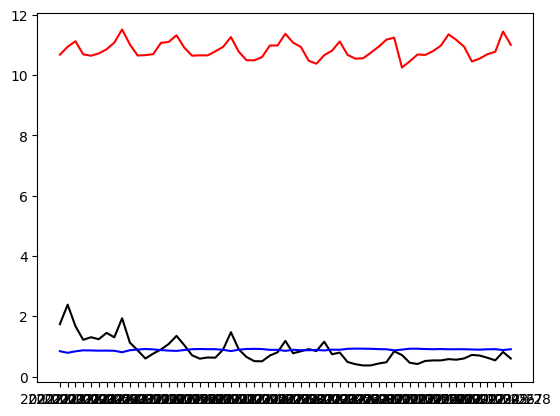

          DATE      KPI_1
8   2022-01-09  11.513513
15  2022-01-16  11.321377
22  2022-01-23  11.262428
24  2022-01-25  10.494448
25  2022-01-26  10.489882
29  2022-01-30  11.371004
32  2022-02-02  10.477010
33  2022-02-03  10.378987
38  2022-02-08  10.545759
39  2022-02-09  10.558106
42  2022-02-12  11.175319
43  2022-02-13  11.243820
44  2022-02-14  10.251074
45  2022-02-15  10.458264
50  2022-02-20  11.353329
51  2022-02-21  11.164289
53  2022-02-23  10.451643
54  2022-02-24  10.548949
57  2022-02-27  11.447142


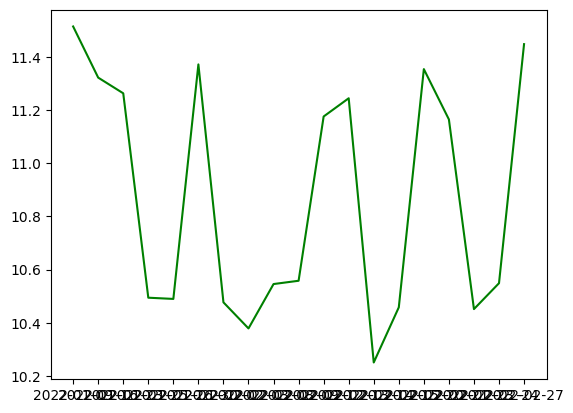

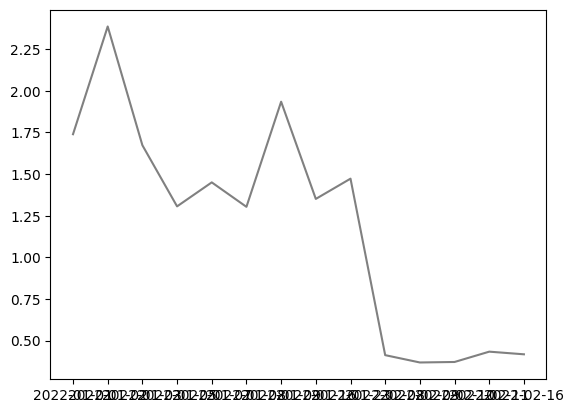

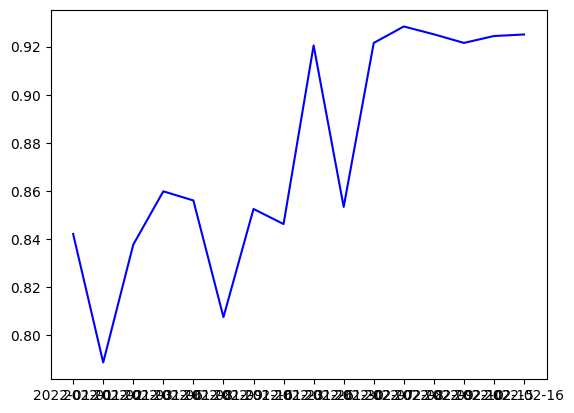

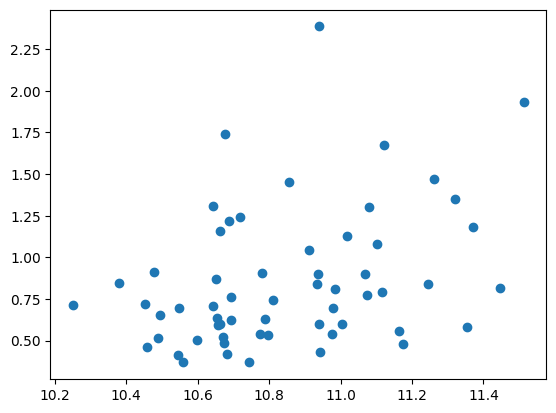

-0.9674310205382215
0.3488471862764615
-0.46345467915161676


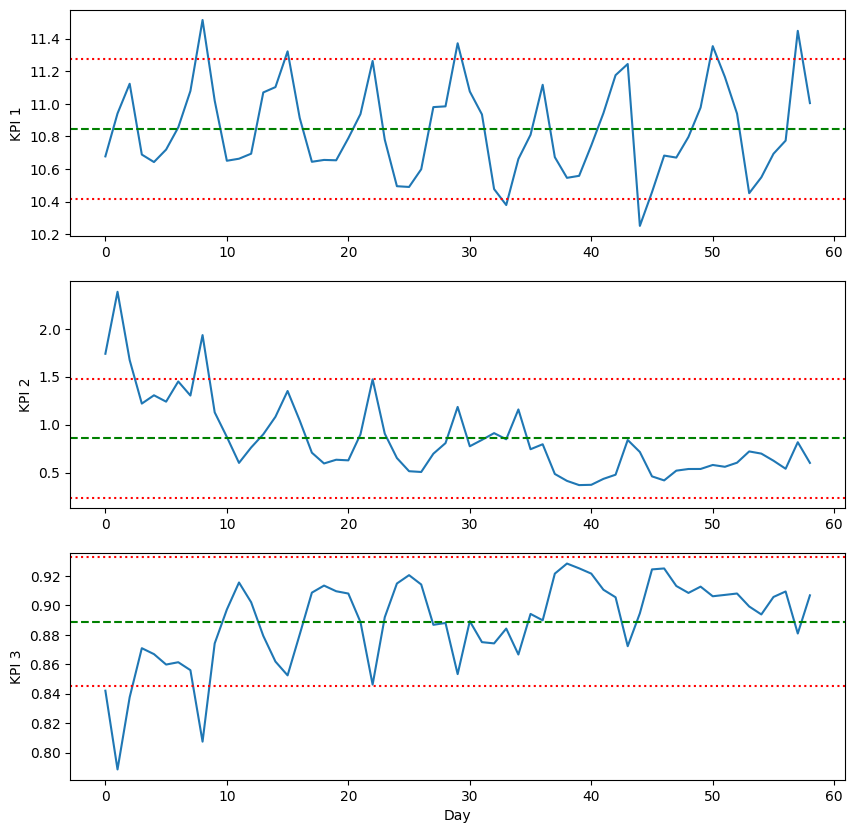

0.005807302644967403
0.007415492113258914


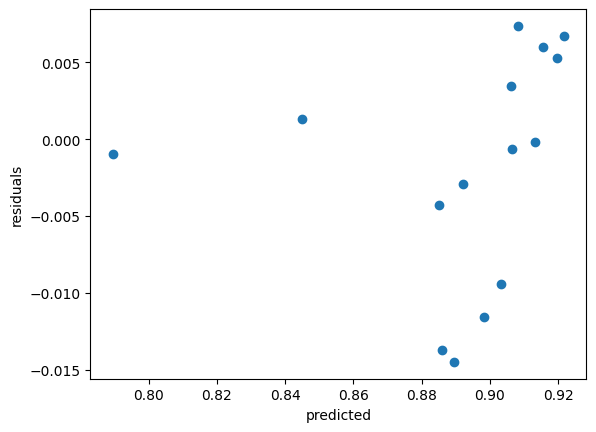

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

quality_csv = pd.read_csv(r"QualityControlData.csv")
print(quality_csv)

"""
Turn each column into a series
"""
kpi_1 = quality_csv["KPI_1"]
kpi_2 = quality_csv["KPI_2"]
kpi_3 = quality_csv["KPI_3"]


"""
Find the mean of each column
"""
kpi1_mean = quality_csv["KPI_1"].mean()
kpi2_mean = quality_csv["KPI_2"].mean()
kpi3_mean = quality_csv["KPI_3"].mean()
print("means: ", kpi1_mean, kpi2_mean, kpi3_mean)


"""
Find the standard deviation of each column
"""
kpi1_sd = kpi_1.std()
kpi2_sd = kpi_2.std()
kpi3_sd = kpi_3.std()
print("standard deviations: ", kpi1_sd, kpi2_sd, kpi3_sd)


"""
Let's find anything above or below one standard deviation for KPI_1
"""
def kpi_outliers(kpi, mean, sd):
    """this helps us find anything above or below one standard deviation of the mean of any given kpi"""
    above_sd = mean + sd
    below_sd = mean - sd
    results = []
    for i in range(len(kpi)):
        if kpi[i] > above_sd or kpi[i] < below_sd:
            results.append(kpi[i])
    return results

kpi1_outlier = kpi_outliers(kpi_1, kpi1_mean, kpi1_sd)
kpi2_outlier = kpi_outliers(kpi_2, kpi2_mean, kpi2_sd)
kpi3_outlier = kpi_outliers(kpi_3, kpi3_mean, kpi3_sd)


"""
now we find out what dates these belong to
"""
def find_dates(values, target_column, column1_drop, column2_drop):
    print(quality_csv[quality_csv[target_column].isin(values)].drop(column1_drop, axis = 1).drop(column2_drop, axis = 1))
    return (quality_csv[quality_csv[target_column].isin(values)].drop(column1_drop, axis = 1).drop(column2_drop, axis = 1))

dates_kpi1 = find_dates(kpi1_outlier, "KPI_1", "KPI_2", "KPI_3")
dates_kpi2 = find_dates(kpi2_outlier, "KPI_2", "KPI_1", "KPI_3")
dates_kpi3 = find_dates(kpi3_outlier, "KPI_3", "KPI_1", "KPI_2")

print(dates_kpi1)

print(quality_csv.corr())
print(quality_csv.describe())

"""
basic graphs
"""
date = quality_csv["DATE"]
plt.plot(date, kpi_1, color="red")
plt.plot(date, kpi_2, color="black")
plt.plot(date, kpi_3, color="blue")
plt.show()

print(dates_kpi1)
plt.plot(dates_kpi1["DATE"], dates_kpi1["KPI_1"], color="green")
plt.show()
plt.plot(dates_kpi2["DATE"], dates_kpi2["KPI_2"], color="gray")
plt.show()
plt.plot(dates_kpi3["DATE"], dates_kpi3["KPI_3"], color="blue")
plt.show()

"""
test scatter plot between kpi1 and kpi2
"""
plt.scatter(kpi_1, kpi_2)
plt.show()

"""
have to do :
- sklearn linear regression
- plot the linear regression
- 1st kpi is pay per hour
- 3rd is on time percentage
"""

'''
correlation between each KPI
'''
def correlation(data1, data2):
    data1_std = (data1 - np.mean(data1)) / np.std(data1)
    data2_std = (data2 - np.mean(data2)) / np.std(data2)
    prod = data1_std * data2_std
    return np.mean(prod)

twothree = correlation(kpi_2, kpi_3) 
onetwo = correlation(kpi_1, kpi_2) 
onethree = correlation(kpi_1, kpi_3) 

print(twothree)
print(onetwo)
print(onethree)

'''
all 3 plots in 1
'''
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(kpi_1)
ax2.plot(kpi_2)
ax3.plot(kpi_3)

ax1.set(ylabel = 'KPI 1')
ax2.set(ylabel = 'KPI 2')
ax3.set(ylabel = 'KPI 3')

ax1.axhline(kpi1_mean, color = 'g', linestyle = '--')
ax1.axhline(kpi1_mean - kpi1_sd * 1.5, color = 'r', linestyle = ':')
ax1.axhline(kpi1_mean + kpi1_sd * 1.5, color = 'r', linestyle = ':')

ax2.axhline(kpi2_mean, color = 'g', linestyle = '--')
ax2.axhline(kpi2_mean - kpi2_sd * 1.5, color = 'r', linestyle = ':')
ax2.axhline(kpi2_mean + kpi2_sd * 1.5, color = 'r', linestyle = ':')

ax3.axhline(kpi3_mean, color = 'g', linestyle = '--')
ax3.axhline(kpi3_mean - kpi3_sd * 1.5, color = 'r', linestyle = ':')
ax3.axhline(kpi3_mean + kpi3_sd * 1.5, color = 'r', linestyle = ':')

plt.xlabel('Day')



plt.show()

'''
modeling
'''

X = quality_csv[['KPI_1', 'KPI_2']]
y = pd.Series(quality_csv['KPI_3'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
linear_model = lm.LinearRegression()
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_test)

def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))

train_rmse_cpc = rmse(y_fitted, y_train)
test_rmse_cpc = rmse(y_predicted, y_test)
print(train_rmse_cpc)
print(test_rmse_cpc)

plt.scatter(y_predicted, y_test - y_predicted)
plt.xlabel("predicted")
plt.ylabel("residuals")
plt.show()

In [3]:
kpi1_outlier_dates = dates_kpi1["DATE"]
kpi2_outlier_dates = dates_kpi2["DATE"]
kpi3_outlier_dates = dates_kpi3["DATE"]
print(kpi1_outlier_dates.where(kpi1_outlier_dates.isin(kpi3_outlier_dates)))
print(kpi1_outlier_dates.where(kpi1_outlier_dates.isin(kpi2_outlier_dates)))
print(kpi2_outlier_dates.where(kpi2_outlier_dates.isin(kpi3_outlier_dates)))

8     2022-01-09
15    2022-01-16
22    2022-01-23
24           NaN
25    2022-01-26
29    2022-01-30
32           NaN
33           NaN
38    2022-02-08
39    2022-02-09
42           NaN
43           NaN
44           NaN
45    2022-02-15
50           NaN
51           NaN
53           NaN
54           NaN
57           NaN
Name: DATE, dtype: object
8     2022-01-09
15    2022-01-16
22    2022-01-23
24           NaN
25           NaN
29           NaN
32           NaN
33           NaN
38    2022-02-08
39    2022-02-09
42           NaN
43           NaN
44           NaN
45           NaN
50           NaN
51           NaN
53           NaN
54           NaN
57           NaN
Name: DATE, dtype: object
0     2022-01-01
1     2022-01-02
2     2022-01-03
4            NaN
6            NaN
7     2022-01-08
8     2022-01-09
15    2022-01-16
22    2022-01-23
38    2022-02-08
39    2022-02-09
40    2022-02-10
41           NaN
46    2022-02-16
Name: DATE, dtype: object


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=13b26ad9-9a68-4e57-b543-d76f901d373f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>